In [1]:
import pandas as pd
print(pd.__version__)


2.3.0


In [1]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
print(df.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [14]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [15]:
df['Age'].isnull().sum()


np.int64(0)

In [16]:
df.dropna(subset=['Embarked'], inplace=True)


In [19]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
df.groupby('Sex')['Survived'].value_counts()


Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: count, dtype: int64

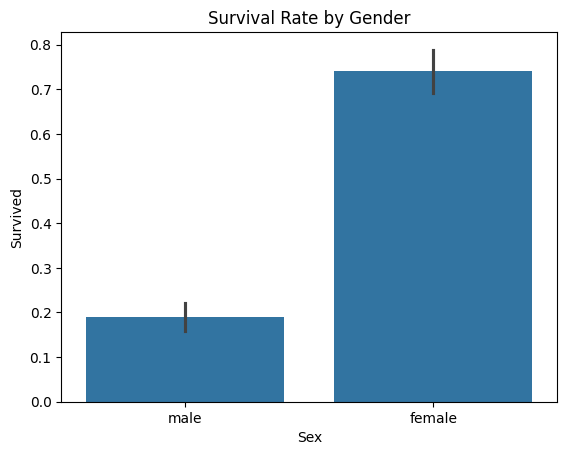

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


In [23]:
df.groupby('Pclass')['Survived'].value_counts()


Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [24]:
df.groupby('Pclass')['Survived'].mean()


Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

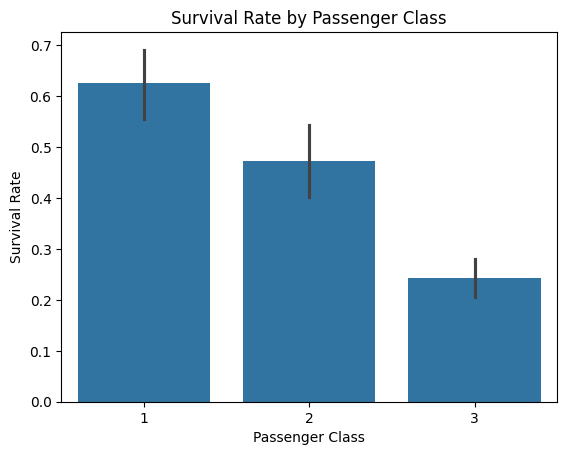

In [25]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


In [26]:
# Create age groups
def age_group(age):
    if age < 13:
        return 'Child'
    elif age < 20:
        return 'Teen'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(age_group)


In [27]:
df['AgeGroup'].value_counts()


AgeGroup
Adult     700
Teen       95
Child      69
Senior     25
Name: count, dtype: int64

In [28]:
df.groupby('AgeGroup')['Survived'].mean()


AgeGroup
Adult     0.364286
Child     0.579710
Senior    0.240000
Teen      0.410526
Name: Survived, dtype: float64

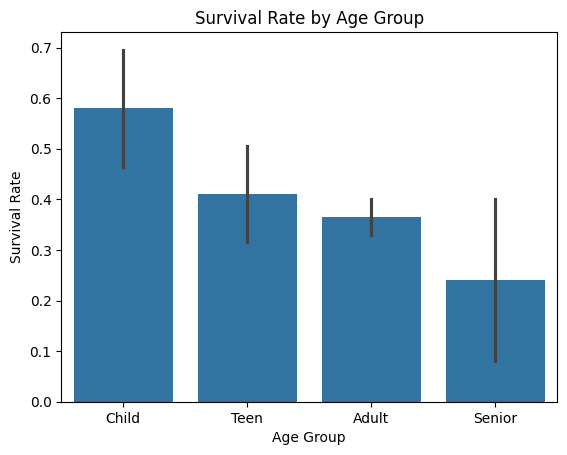

In [29]:
sns.barplot(x='AgeGroup', y='Survived', data=df, order=['Child', 'Teen', 'Adult', 'Senior'])
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


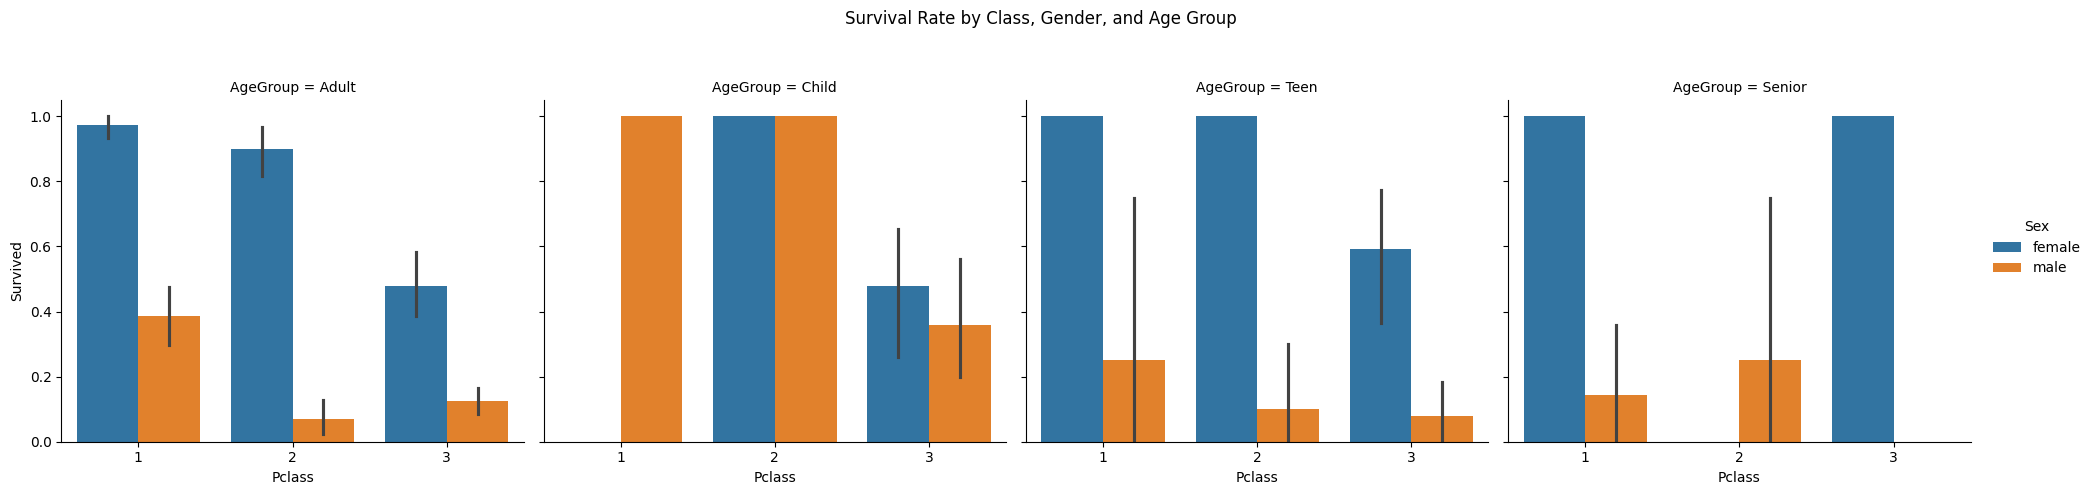

In [30]:
sns.catplot(
    data=df,
    x='Pclass', 
    y='Survived', 
    hue='Sex', 
    col='AgeGroup', 
    kind='bar',
    order=[1, 2, 3],
    hue_order=['female', 'male']
)

plt.subplots_adjust(top=0.8)
plt.suptitle('Survival Rate by Class, Gender, and Age Group')
plt.show()


In [31]:
df.groupby(['Sex', 'Pclass', 'AgeGroup'])['Survived'].mean().round(2)


Sex     Pclass  AgeGroup
female  1       Adult       0.97
                Child       0.00
                Senior      1.00
                Teen        1.00
        2       Adult       0.90
                Child       1.00
                Teen        1.00
        3       Adult       0.48
                Child       0.48
                Senior      1.00
                Teen        0.59
male    1       Adult       0.39
                Child       1.00
                Senior      0.14
                Teen        0.25
        2       Adult       0.07
                Child       1.00
                Senior      0.25
                Teen        0.10
        3       Adult       0.12
                Child       0.36
                Senior      0.00
                Teen        0.08
Name: Survived, dtype: float64

In [32]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  AgeGroup     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeGroup       0
dtype: int64

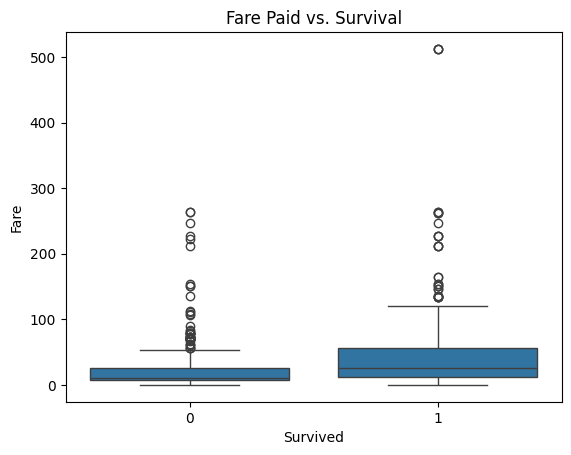

In [34]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Paid vs. Survival')
plt.show()
